In [78]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
%%writefile Peugeot207.csv
code,brand,km,model,year,color,gearbox,option,price
0,Peugeot,0,207,1399,Grey,Manual,Typical,310
1,Peugeot,0,207,1400,White,Manual,Typical,320
2,Peugeot,0,207,1400,Black,Manual,Typical,340
3,Peugeot,0,207,1400,White,Manual,Typical,325
4,Peugeot,0,207,1400,White,Manual,Typical,320
5,Peugeot,0,207,1398,Black,Automatic,Typical,378
6,Peugeot,0,207,1400,Silver,Automatic,Panaroma,420
7,Peugeot,0,207,1399,Grey,Automatic,Panaroma,430
8,Peugeot,0,207,1399,White,Manual,Panaroma,400
9,Peugeot,0,207,1400,White,Automatic,Panaroma,425
10,Peugeot,0,207,1400,Black,Automatic,Panaroma,425
11,Peugeot,0,207,1400,Grey,Automatic,Typical,408
12,Peugeot,0,207,1400,Black,Automatic,Panaroma,422
13,Peugeot,0,207,1399,Grey,Manual,Panaroma,330
14,Peugeot,0,207,1399,White,Manual,Typical,313

Writing Peugeot207.csv


In [14]:
# Reading dataset
df_orginal = pd.read_csv("Peugeot207.csv")
df_orginal.shape

(15, 9)

In [15]:
df_orginal.head()

,code,brand,km,model,year,color,gearbox,option,price
0,0,Peugeot,0,207,1399,Grey,Manual,Typical,310
1,1,Peugeot,0,207,1400,White,Manual,Typical,320
2,2,Peugeot,0,207,1400,Black,Manual,Typical,340
3,3,Peugeot,0,207,1400,White,Manual,Typical,325
4,4,Peugeot,0,207,1400,White,Manual,Typical,320


In [16]:
df_orginal.model.unique()

array([207], dtype=int64)

In [17]:
df_orginal.gearbox.unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df_orginal.option.unique()

array(['Typical', 'Panaroma'], dtype=object)

In [19]:
df = df_orginal.copy()

In [20]:
# Dropping unnecessary columns
df = df.drop(labels=["code", "brand", "km", "model"], axis=1)

In [21]:
df.sample(5)

,year,color,gearbox,option,price
9,1400,White,Automatic,Panaroma,425
7,1399,Grey,Automatic,Panaroma,430
14,1399,White,Manual,Typical,313
3,1400,White,Manual,Typical,325
10,1400,Black,Automatic,Panaroma,425


In [22]:
# Checking and handling missing values
df.isna().sum()

year       0
color      0
gearbox    0
option     0
price      0
dtype: int64

In [45]:
# One hot encoding
color_onehot = pd.get_dummies(df["color"], prefix="color", dtype="int", drop_first=True)

In [47]:
color_onehot.sample(5)

,color_Grey,color_Silver,color_White
4,0,0,1
7,1,0,0
6,0,1,0
5,0,0,0
12,0,0,0


In [48]:
df.tail()

,year,color,gearbox,option,price
10,1400,Black,Automatic,Panaroma,425
11,1400,Grey,Automatic,Typical,408
12,1400,Black,Automatic,Panaroma,422
13,1399,Grey,Manual,Panaroma,330
14,1399,White,Manual,Typical,313


In [49]:
# One hot encoding
gearbox_onehot = pd.get_dummies(df["gearbox"], prefix="gearbox", dtype="int", drop_first=True)
gearbox_onehot.sample(5)

,gearbox_Manual
14,1
1,1
3,1
7,0
6,0


In [50]:
df.head()

,year,color,gearbox,option,price
0,1399,Grey,Manual,Typical,310
1,1400,White,Manual,Typical,320
2,1400,Black,Manual,Typical,340
3,1400,White,Manual,Typical,325
4,1400,White,Manual,Typical,320


In [51]:
# One hot encoding
option_onehot = pd.get_dummies(df["option"], prefix="option", dtype="int", drop_first=True)
option_onehot.sample(5)

,option_Typical
14,1
3,1
6,0
4,1
7,0


In [53]:
# One hot encoding
df_encoded = pd.concat([df, color_onehot, gearbox_onehot, option_onehot], axis=1)
df_encoded.head()

,year,color,gearbox,option,price,color_Grey,color_Silver,color_White,gearbox_Manual,option_Typical
0,1399,Grey,Manual,Typical,310,1,0,0,1,1
1,1400,White,Manual,Typical,320,0,0,1,1,1
2,1400,Black,Manual,Typical,340,0,0,0,1,1
3,1400,White,Manual,Typical,325,0,0,1,1,1
4,1400,White,Manual,Typical,320,0,0,1,1,1


In [54]:
# One hot encoding
df_encoded = df_encoded.drop(labels=["color" , "gearbox", "option"], axis=1)
df_encoded.tail()

,year,price,color_Grey,color_Silver,color_White,gearbox_Manual,option_Typical
10,1400,425,0,0,0,0,0
11,1400,408,1,0,0,0,1
12,1400,422,0,0,0,0,0
13,1399,330,1,0,0,1,0
14,1399,313,0,0,1,1,1


In [56]:
# Standard scaling
standard_scaler = StandardScaler()

In [57]:
standard_scaler

StandardScaler()

In [60]:
# Standard scaling
year_scaled = standard_scaler.fit_transform(df[["year"]])
year_scaled

array([[-0.86266219],
       [ 0.75482941],
       [ 0.75482941],
       [ 0.75482941],
       [ 0.75482941],
       [-2.48015378],
       [ 0.75482941],
       [-0.86266219],
       [-0.86266219],
       [ 0.75482941],
       [ 0.75482941],
       [ 0.75482941],
       [ 0.75482941],
       [-0.86266219],
       [-0.86266219]])

In [62]:
# Standard scaling
df_scaled = df_encoded.assign(year_standard = year_scaled)
df_scaled.sample(5)

,year,price,color_Grey,color_Silver,color_White,gearbox_Manual,option_Typical,year_standard
9,1400,425,0,0,1,0,0,0.754829
12,1400,422,0,0,0,0,0,0.754829
13,1399,330,1,0,0,1,0,-0.862662
11,1400,408,1,0,0,0,1,0.754829
8,1399,400,0,0,1,1,0,-0.862662


In [64]:
# Standard scaling
df_cleaned = df_scaled.drop(labels="year", axis=1)
df_cleaned.head()

,price,color_Grey,color_Silver,color_White,gearbox_Manual,option_Typical,year_standard
0,310,1,0,0,1,1,-0.862662
1,320,0,0,1,1,1,0.754829
2,340,0,0,0,1,1,0.754829
3,325,0,0,1,1,1,0.754829
4,320,0,0,1,1,1,0.754829


In [65]:
# Standard scaling
df_cleaned.columns.tolist()

['price',
 'color_Grey',
 'color_Silver',
 'color_White',
 'gearbox_Manual',
 'option_Typical',
 'year_standard']

In [67]:
# Standard scaling
df_cleaned = df_cleaned.reindex(columns=['color_Grey',
                            'color_Silver',
                            'color_White',
                            'gearbox_Manual',
                            'option_Typical',
                            'year_standard',
                            'price'])
df_cleaned.sample(5)

,color_Grey,color_Silver,color_White,gearbox_Manual,option_Typical,year_standard,price
7,1,0,0,0,0,-0.862662,430
13,1,0,0,1,0,-0.862662,330
2,0,0,0,1,1,0.754829,340
12,0,0,0,0,0,0.754829,422
14,0,0,1,1,1,-0.862662,313


In [69]:
# Train and test spliting
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]
X.shape, y.shape

((15, 6), (15,))

In [88]:
# Train and test spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test.shape

(3, 6)

In [89]:
# Linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [91]:
# Regression score
reg.score(X_test, y_test)

0.9559000895363202

In [95]:
# y_pred vs y_true
y_pred = reg.predict(X_test)
y_true = y_test
df_pred_vs_true = pd.DataFrame({"Predicted":y_pred, "Actual":y_true})
df_pred_vs_true

,Predicted,Actual
3,329.931034,325
7,416.304187,430
6,429.182266,420


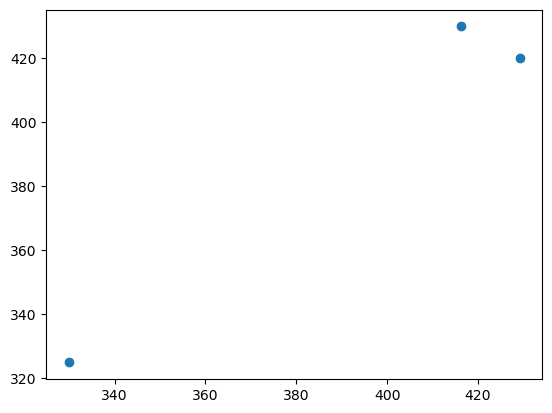

In [97]:
plt.scatter(x=y_pred, y=y_true);

In [100]:
# Predicting a new sample
new_sample = [0, 0, 0, 0, 0, 1.25]
reg.predict([new_sample])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([430.97194858])